In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np

In [28]:
data = pd.read_csv('car data.csv')

In [29]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
data.shape

(301, 9)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [13]:
# encoding "Fuel_Type" Column
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [14]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [15]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
Y = data['Selling_Price']

In [14]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [15]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=1)

In [17]:
lin_reg_model = LinearRegression()

In [18]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [19]:
training_data_prediction = lin_reg_model.predict(X_train)

In [20]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8886588257606458


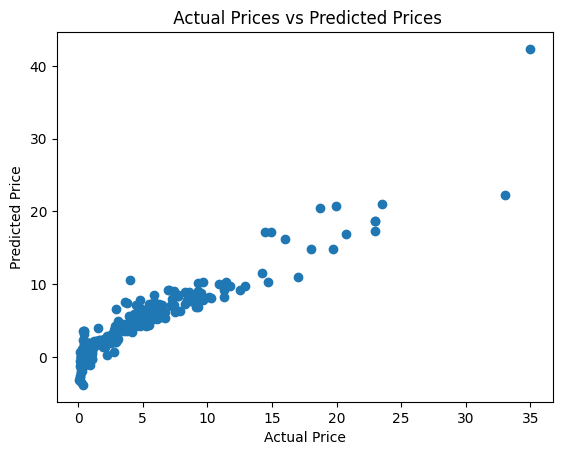

In [26]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [27]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [28]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.3931106765727437


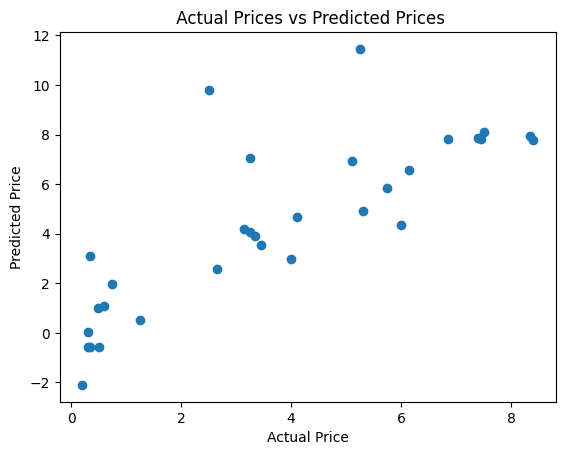

In [29]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [30]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [31]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [32]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [21]:
input_data = (2014,6.52,45000,0,0,1,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lin_reg_model.predict(input_data_reshaped)
print(prediction)

[5.99550138]


C:\Users\Mehedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
import pickle

In [23]:
filename = 'car_model.sav'
pickle.dump(lin_reg_model, open(filename, 'wb'))

In [24]:
loaded_model = pickle.load(open('car_model.sav', 'rb'))

In [25]:
input_data = (2014,6.52,45000,0,0,1,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

[5.99550138]


C:\Users\Mehedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
for column in X.columns:
  print(column)

Year
Present_Price
Kms_Driven
Fuel_Type
Seller_Type
Transmission
Owner


# Using OneHotEncoding

In [30]:
data = pd.read_csv('car data.csv')

In [31]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
Y = data['Selling_Price']

In [32]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Dealer,Manual,0
297,2015,5.90,60000,Petrol,Dealer,Manual,0
298,2009,11.00,87934,Petrol,Dealer,Manual,0
299,2017,12.50,9000,Diesel,Dealer,Manual,0


In [33]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=1)

In [35]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()

In [36]:
onehot.fit(X[['Fuel_Type','Seller_Type','Transmission']])

OneHotEncoder()

In [37]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [38]:
column_trans = make_column_transformer((OneHotEncoder(categories=onehot.categories_),['Fuel_Type','Seller_Type','Transmission']),remainder='passthrough')

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr=LinearRegression()

In [41]:
pipe=make_pipeline(column_trans,lr)

In [42]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['CNG', 'Diesel', 'Petrol'], dtype=object),
                                                                            array(['Dealer', 'Individual'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object)]),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])])),
                ('linearregression', LinearRegression())])

In [43]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['CNG', 'Diesel', 'Petrol'], dtype=object),
                                                                            array(['Dealer', 'Individual'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object)]),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])])),
                ('linearregression', LinearRegression())])

In [44]:
y_pred=pipe.predict(X_test)

In [45]:
y_pred

array([ 7.81571082,  2.97397349, -0.51868592,  4.1824677 ,  0.52531398,
        5.78936015,  1.94468562,  2.59149653,  7.7266758 ,  0.98549534,
        8.10049466,  3.51673114,  4.88719327,  4.60739441, -2.0797094 ,
        3.09417821,  7.95244807,  6.7558933 ,  6.89442966,  7.98707163,
        4.31991767,  4.07318399, 11.38026446,  8.05346588,  9.60944582,
        3.45853307,  3.87217962,  1.07104394, -0.57093739, -0.55817872,
        0.03214186])

In [46]:
r2_score(Y_test,y_pred)

0.47306784471444474

In [47]:
scores=[]
for i in range(1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,Y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(Y_test,y_pred))

In [48]:
import numpy as np

In [49]:
np.argmax(scores)

200

In [50]:
scores[np.argmax(scores)]

0.9549328971849599

In [51]:
for column in X.columns:
  print(column)

Year
Present_Price
Kms_Driven
Fuel_Type
Seller_Type
Transmission
Owner


In [56]:
pipe.predict(pd.DataFrame(columns=['Year','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'],data=np.array([2014,9.55,29000,'Petrol','Dealer','Manual',0]).reshape(1,7)))

array([5.50610428])

In [57]:
import pickle

In [58]:
pickle.dump(pipe,open('car_model_Updated.sav','wb'))

In [59]:
loaded_model = pickle.load(open('car_model_Updated.sav', 'rb'))

In [60]:
loaded_model.predict(pd.DataFrame(columns=['Year','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'],data=np.array([2014,9.55,29000,'Petrol','Dealer','Manual',0]).reshape(1,7)))

array([5.50610428])